In [ ]:
'''
Quantitative Finance

Project:    Portolio Analysis 
Objective:  Return the risk analysis of sevene (7) stock portfolio 
            against the S&P500 (SPY), Russell 2000 (IWM), and the
            Dow Jones Industrial Average (DIA)
Author:     Jose Aponte
'''

In [32]:
import yfinance as yf
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
# 1. Create a table showing constituent (stocks) risk analysis in the equal-weight portfolio analysis as of the current date

In [34]:
########## Tickers ##########

"""""
These stocks were chosen by weight from S&P500
AAPL =  Apple Inc
MSFT =  Microsoft Corporation
AMAZN = Amazon.com Inc
TSLA =  Tesla Inc
GOOGL = Alphabet Inc. Class A
UNH =   UnitedHealth Group Incorporate
JNJ =   Johnson and Johnson
"""""
tickers = ['AAPL','MSFT','AMZN','TSLA','GOOGL','UNH','JNJ']

########## Exchange Traded Fund ##########

"""
SPY =   SPDR S&P 500 ETF Trust
IWM =   iShares Russell 2000 ETF
DIA =   SPDR Dow Jones Industrial Average ETF Trust
"""

etf = ['SPY','IWM','DIA']

dataFinance = yf.download(tickers+etf, period= ' 10y')
dataFinance = dataFinance['Adj Close']
dataFinance.head()

[*********************100%***********************]  10 of 10 completed


,AAPL,AMZN,DIA,GOOGL,IWM,JNJ,MSFT,SPY,TSLA,UNH
Date,,,,,,,,,,
2012-10-08,19.543915,12.9530,109.220001,18.964966,72.878830,52.767162,24.424267,120.658989,1.950000,49.346840
2012-10-09,19.472860,12.5480,108.366539,18.620871,72.024315,51.984447,24.014187,119.465996,1.891333,49.235470
2012-10-10,19.627815,12.2495,107.311768,18.632633,71.910957,51.840076,23.768143,118.703804,1.893333,48.927055
2012-10-11,19.235508,12.2110,107.190926,18.805805,72.172539,51.650101,23.743534,118.770111,1.888000,49.398251
2012-10-12,19.284817,12.1180,107.190926,18.637386,71.588333,51.650101,23.948572,118.380661,1.842667,48.892807


In [35]:
########## Portfolio Weight Calculator ##########

dataFinance['Portfolio'] = dataFinance[tickers].mean(axis=1)
returns = dataFinance.pct_change()

table = pd.DataFrame(index=tickers)
table['Portfolio Weight [%]'] = (format((1/len(tickers))*100,'.2f'))

table

,Portfolio Weight [%]
AAPL,14.29
MSFT,14.29
AMZN,14.29
TSLA,14.29
GOOGL,14.29
UNH,14.29
JNJ,14.29


In [36]:
########## Annualized Volatility ##########

# Number 63 means 63-days ~ 3-month back until today 

volatilityTrailing3Month = returns[-63:].dropna()
table['Annualized Volatility (Trailing 3-months)'] = (((volatilityTrailing3Month.var()/volatilityTrailing3Month.std())**(1/np.sqrt(4)))*100)

table

,Portfolio Weight [%],Annualized Volatility (Trailing 3-months)
AAPL,14.29,13.978280
MSFT,14.29,13.911811
AMZN,14.29,16.696619
TSLA,14.29,17.994751
GOOGL,14.29,15.084452
UNH,14.29,11.849651
JNJ,14.29,10.170432


In [37]:
########## Beta against ETF ##########

# Number 252 means 252-days ~ 12-month back until today

beta = returns[-252:].cov()/returns[-252:].var()
for eachItem in etf:
    table['Beta Against '+eachItem]=beta[eachItem]

table

,Portfolio Weight [%],Annualized Volatility (Trailing 3-months),Beta Against SPY,Beta Against IWM,Beta Against DIA
AAPL,14.29,13.978280,1.230822,0.881553,1.366270
MSFT,14.29,13.911811,1.205502,0.834534,1.310497
AMZN,14.29,16.696619,1.612498,1.199140,1.732068
TSLA,14.29,17.994751,1.825396,1.522621,1.798492
GOOGL,14.29,15.084452,1.308228,0.917676,1.417735
UNH,14.29,11.849651,0.640762,0.397191,0.846812
JNJ,14.29,10.170432,0.287457,0.121083,0.436201


In [38]:
########## Drawdown Calculation ##########

drawdown = (returns[-252:].rolling(5).min() - returns[-252:].rolling(5).max())/returns[-252:].rolling(5).max()
table['Average Weekly Drawdown'] = drawdown.mean()
table['Maximum Weekly Drawdown'] = drawdown.max()

table

,Portfolio Weight [%],Annualized Volatility (Trailing 3-months),Beta Against SPY,Beta Against IWM,Beta Against DIA,Average Weekly Drawdown,Maximum Weekly Drawdown
AAPL,14.29,13.978280,1.230822,0.881553,1.366270,-2.094975,21.658429
MSFT,14.29,13.911811,1.205502,0.834534,1.310497,-2.695036,39.152941
AMZN,14.29,16.696619,1.612498,1.199140,1.732068,-1.328757,415.168310
TSLA,14.29,17.994751,1.825396,1.522621,1.798492,-3.505494,6.799648
GOOGL,14.29,15.084452,1.308228,0.917676,1.417735,-3.227105,14.960796
UNH,14.29,11.849651,0.640762,0.397191,0.846812,-3.863575,3.289699
JNJ,14.29,10.170432,0.287457,0.121083,0.436201,-2.098990,88.421339


In [39]:
########## Total Return and Annualized Total Return (using trailing 10-years) ##########

table['TotalReturn']=dataFinance.pct_change(len(dataFinance)-1)[-1:].T
table['Annualized Total Returns']=table.TotalReturn**(1/np.sqrt(252))

table.T

,AAPL,MSFT,AMZN,TSLA,GOOGL,UNH,JNJ
Portfolio Weight [%],14.29,14.29,14.29,14.29,14.29,14.29,14.29
Annualized Volatility (Trailing 3-months),13.97828,13.911811,16.696619,17.994751,15.084452,11.849651,10.170432
Beta Against SPY,1.230822,1.205502,1.612498,1.825396,1.308228,0.640762,0.287457
Beta Against IWM,0.881553,0.834534,1.19914,1.522621,0.917676,0.397191,0.121083
Beta Against DIA,1.36627,1.310497,1.732068,1.798492,1.417735,0.846812,0.436201
Average Weekly Drawdown,-2.094975,-2.695036,-1.328757,-3.505494,-3.227105,-3.863575,-2.09899
Maximum Weekly Drawdown,21.658429,39.152941,415.16831,6.799648,14.960796,3.289699,88.421339
TotalReturn,6.524593,9.206976,8.30325,123.656408,4.376229,9.670186,2.101524
Annualized Total Returns,1.125413,1.150095,1.142634,1.354557,1.097452,1.153657,1.047895


In [40]:
# 2. Create a table showing Portfolio Risk agains the three ETFs:

In [41]:
########## Correlation against ETF ##########

tableETF = pd.DataFrame(index=etf)
tableETF['Correlation']=returns[etf+['Portfolio']].corr().Portfolio

tableETF

,Correlation
SPY,0.886032
IWM,0.726425
DIA,0.832925


In [42]:
########## Covariance of Portfolio against ETF ##########

tableETF['Covariance']=returns[etf+['Portfolio']].cov().Portfolio*10000

tableETF

,Correlation,Covariance
SPY,0.886032,1.201391
IWM,0.726425,1.232650
DIA,0.832925,1.134683


In [43]:
########## Tracking Errors (Using trailing 10-years) ##########


for eachItem in etf:
    tableETF.loc[eachItem, 'TrackingError'] = (returns[eachItem]-returns.Portfolio).std()*100

tableETF

,Correlation,Covariance,TrackingError
SPY,0.886032,1.201391,0.584804
IWM,0.726425,1.232650,0.967696
DIA,0.832925,1.134683,0.697375


In [44]:
########## Sharpe Ratio (using current risk-free rate) ##########

excessReturn = (returns.Portfolio[-252:]-(0.02/np.sqrt(252)))
tableETF['Sharpe'] = 0
for eachItem in etf:
    tableETF.loc[eachItem, 'Sharpe'] = (excessReturn/(returns[-252:].Portfolio - returns[-252:][eachItem]).std())[-1]

tableETF

,Correlation,Covariance,TrackingError,Sharpe
SPY,0.886032,1.201391,0.584804,-0.073543
IWM,0.726425,1.232650,0.967696,-0.049081
DIA,0.832925,1.134683,0.697375,-0.055400


In [45]:
########## Annualized Volatility (252 days) Spread (Portfolio Volatility - ETF Volatility) ##########

tableETF['VolatilitySpread'] = returns[etf+['Portfolio']][-252:].std() ** (1/252)

tableETF.T

,SPY,IWM,DIA
Correlation,0.886032,0.726425,0.832925
Covariance,1.201391,1.232650,1.134683
TrackingError,0.584804,0.967696,0.697375
Sharpe,-0.073543,-0.049081,-0.055400
VolatilitySpread,0.983196,0.983937,0.982470


<function matplotlib.pyplot.show(close=None, block=None)>

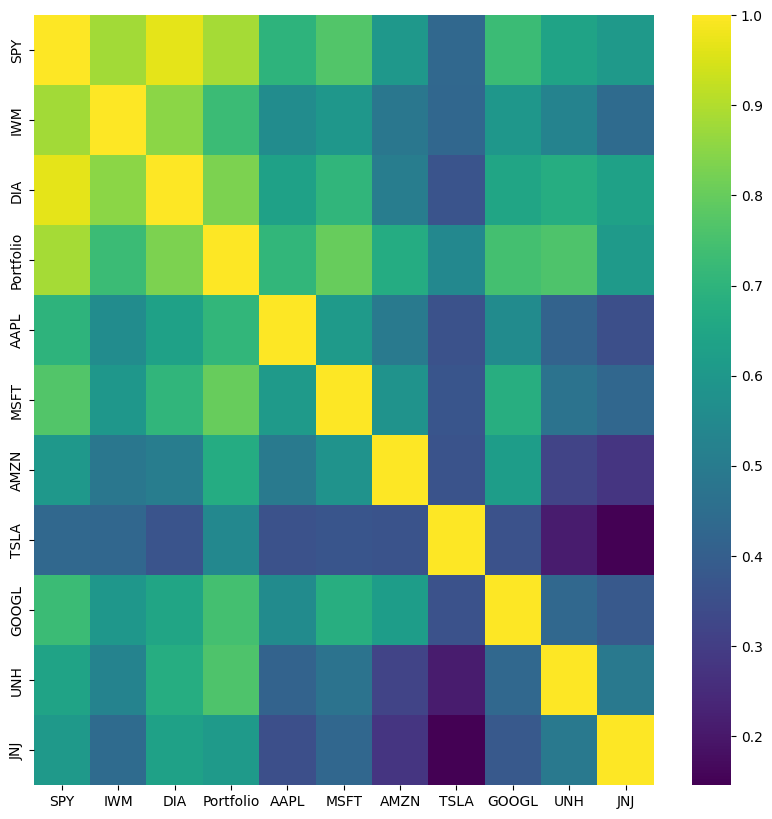

In [47]:
# 3. Create a correlation matrix showing the correlations between the equal-weighted portfolio, 3 ETFs, and the 7 stocks.

# A correlation matrix is a heatmap

fig, ax = plt.subplots(figsize=(10,10))
sns.heatmap(returns[etf+['Portfolio']+tickers].corr(),cmap='viridis')
plt.show
